In [2]:
import pandas as pd
import pyfitit as pfit

In [3]:
data = pd.read_excel("RGB AuNPs.xlsx")
data.head()

,Unnamed: 0,аск,твин,R,G,B,Wave
0,1,34,182,196.696863,136.595965,156.857898,720.27
1,2,145,145,168.321243,126.603379,148.614721,705.81
2,3,52,200,194.230624,135.815690,155.965974,719.01
3,4,24,61,205.763882,159.659322,173.983518,724.89
4,5,42,98,189.775845,113.931563,139.802546,716.74


Try predict by: ['аск', 'твин']
R - regression score: {'R2-score': 0.7142526641374951, 'MAE': 8.31365825112239, 'MAX': 24.373972117202186, 'RMSE': 10.231265796154904, 'R2-score interval': array([0.29578018, 0.8840539 ]), 'RMSE interval': array([ 7.82752339, 14.77465878]), 'MAE interval': array([ 5.45020687, 11.17710963])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.]), 'MAE interval': array([0., 0.])}
G - regression score: {'R2-score': 0.17162722287818433, 'MAE': 13.636860342332238, 'MAX': 57.950875029536846, 'RMSE': 18.18251331109767, 'R2-score interval': array([-1.0415117 ,  0.66387581]), 'RMSE interval': array([13.91069795, 26.25681272]), 'MAE interval': array([ 7.86200153, 19.41171916])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.]), 'MAE interval': array([0., 0.])}
B - regression score: {'R2-score': 0.1935179526948141, 'MA

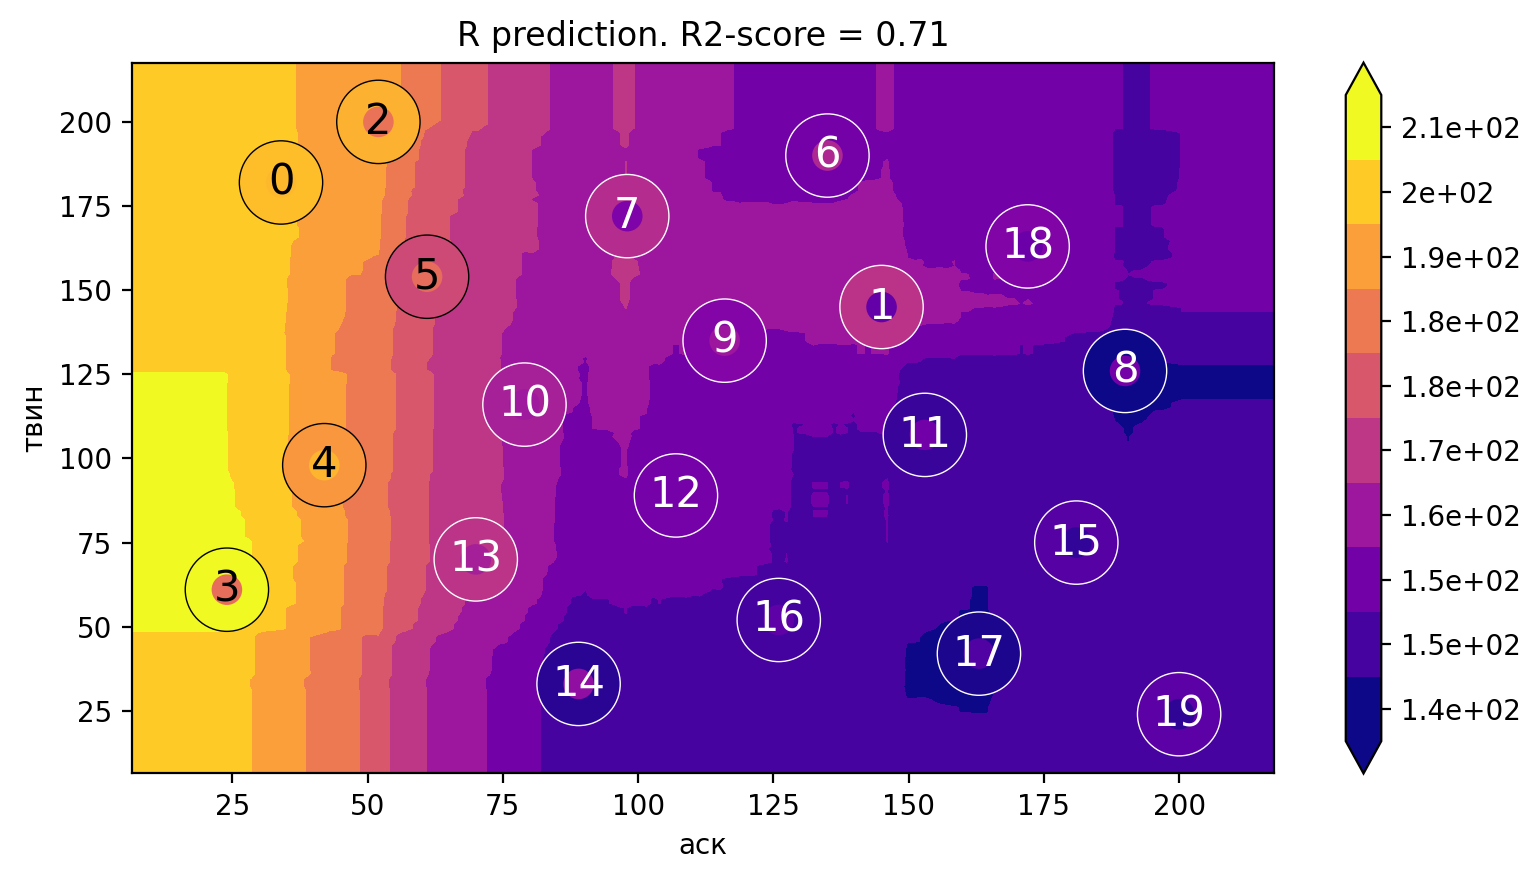

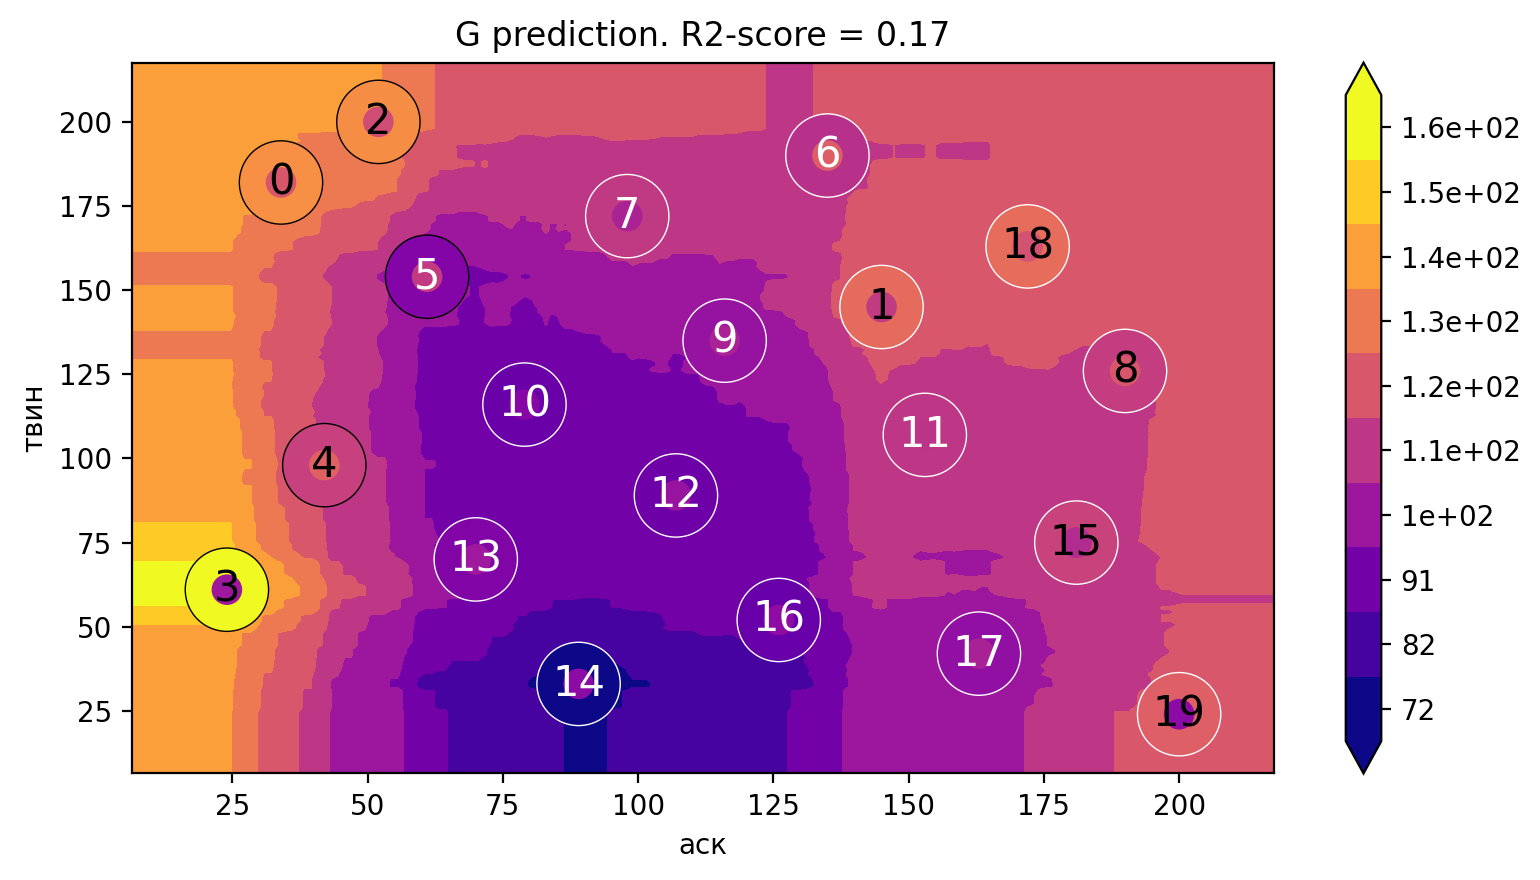

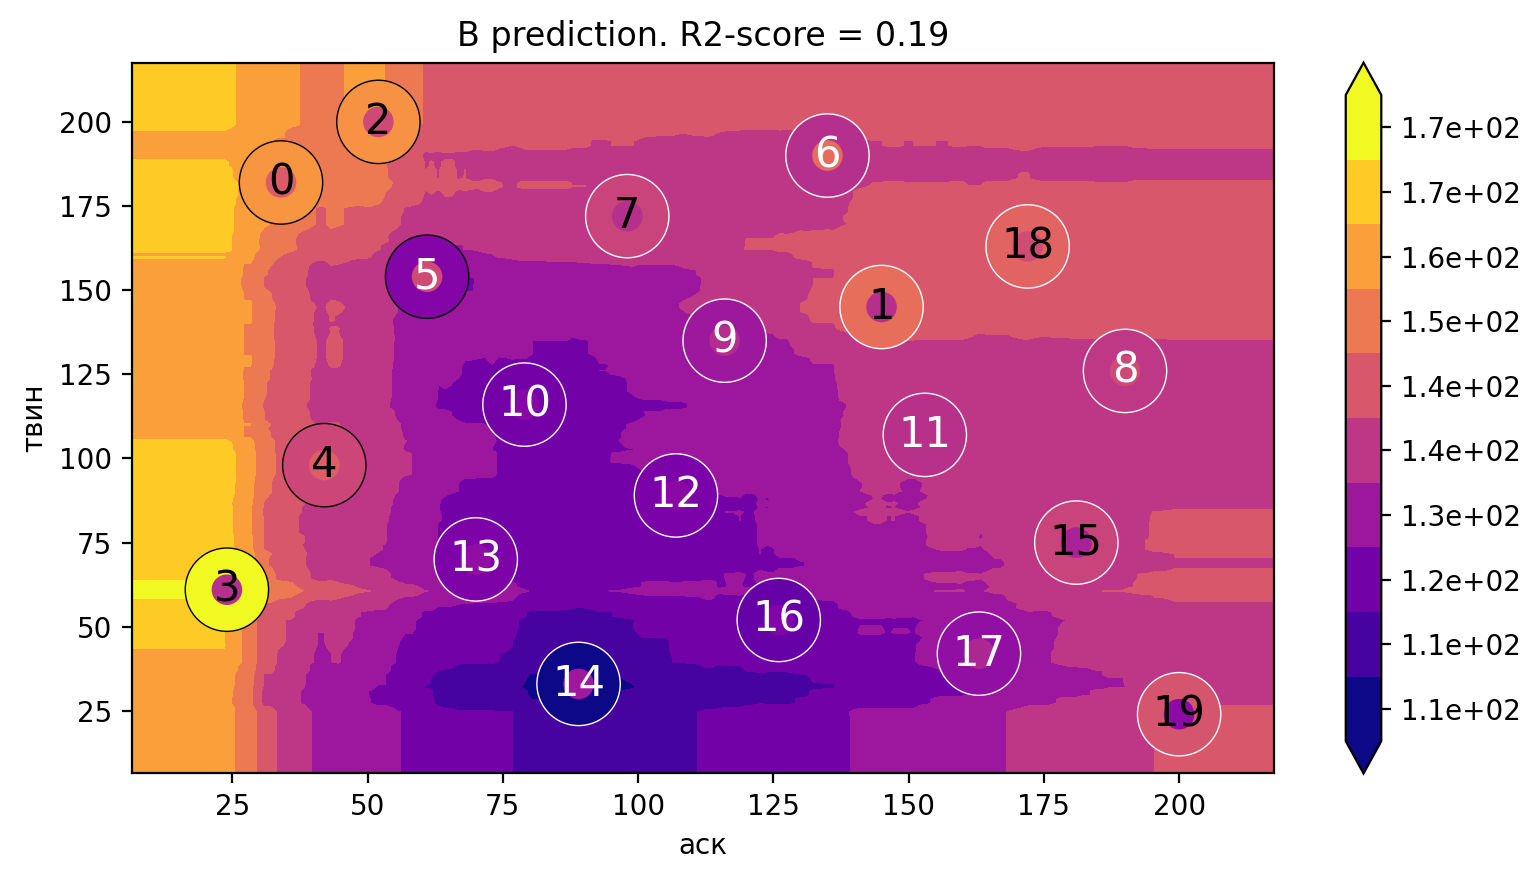

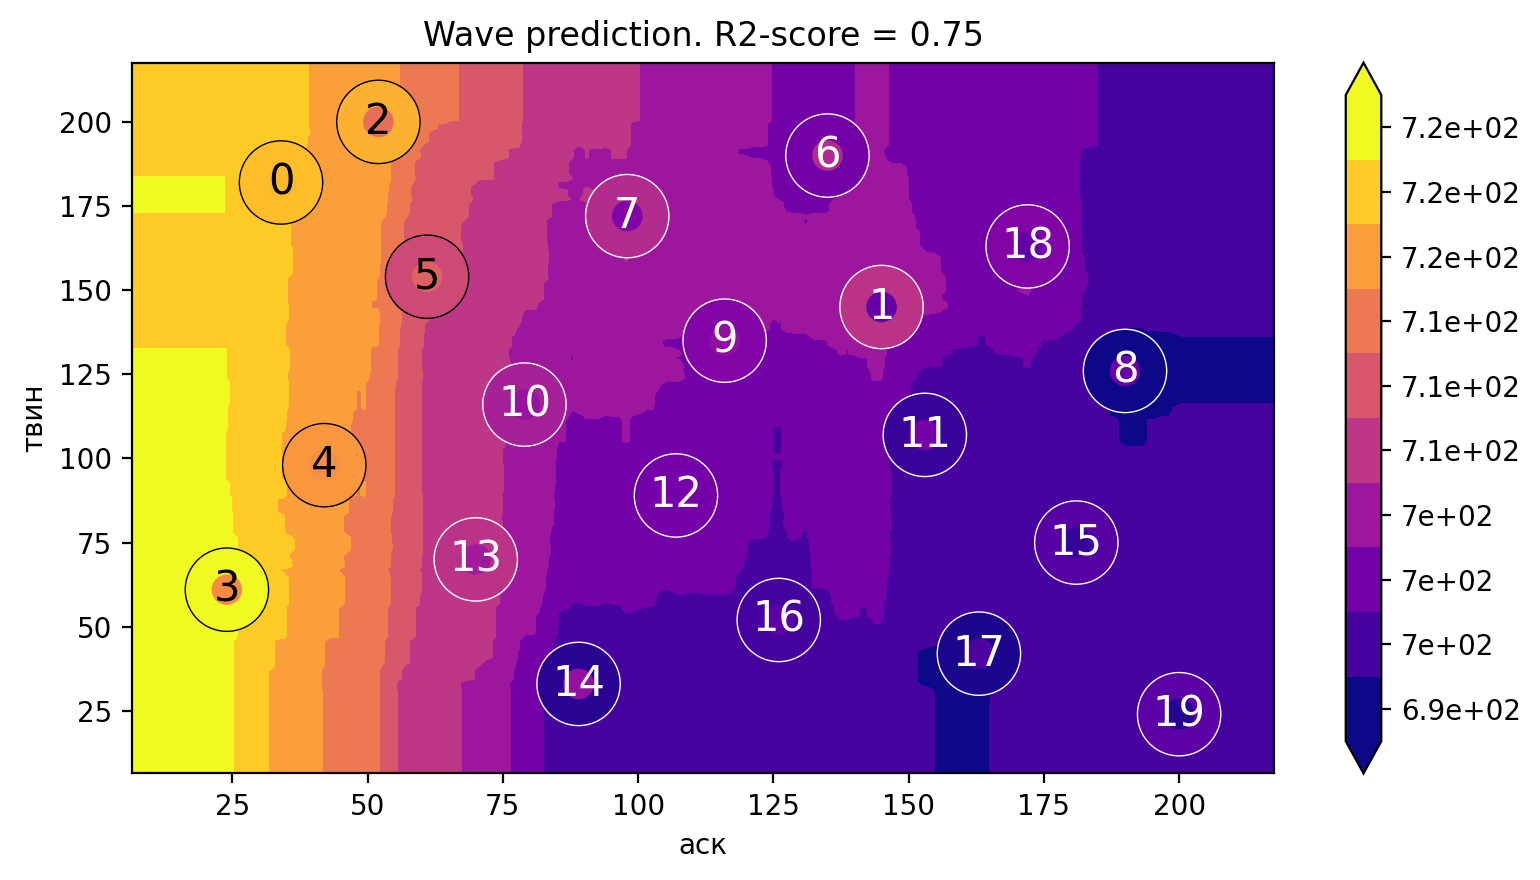

In [7]:
import numpy as np


def plotting_settinngs(ax):
    # f = 14
    # ax.set_title(ax.get_title(), fontsize=f + 2)

    # ax.set_xlabel("аскорбинка, µl", fontsize=f)
    # ax.set_ylabel("твин, µl", fontsize=f)

    # # # ax.set_xticks(np.arange(1, 3, 0.5))
    # # # ax.set_yticks(np.arange(1, 3, 0.5))

    # # ax.set_xticklabels(ax.get_xticklabels(), fontsize=f)
    # # ax.set_yticklabels(ax.get_yticklabels(), fontsize=f)
    # # соотношение осей на графике
    # ax.set_aspect(1)
    # # размеры картинки
    # ax.figure.set_figwidth(5)
    # ax.figure.set_figheight(5)
    ax.figure.tight_layout()


pfit.plotDescriptors2d(
    data,
    descriptorNames=[data.columns[1], data.columns[2]],
    labelNames=data.columns[3:7],
    cv_count=len(data),
    folder_prefix="results/rgb 20 samples",
    additionalMapPlotFunc=plotting_settinngs,
    dpi=200,
    cmap="plasma",
    # textsize=0,
    # markersize=10,
    plotPadding=0.1,
)

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVR

mesh_size = 0.02
margin = 0

X = data[["v AA", "v TC"]]
y = data["I(max)"]

# Condition the model on sepal width and length, predict the petal width
model = SVR()
model.fit(X, y)

# Create a mesh grid on which we will run our model
x_min, x_max = X["v AA"].min() - margin, X["v AA"].max() + margin
y_min, y_max = X["v TC"].min() - margin, X["v TC"].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(data, x="v AA", y="v TC", z="I(max)")
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name="pred_surface"))
fig.show()

In [ ]:
from sklearn.svm import SVC

model = SVC(probability=True)

fig, ax = plt.subplots()
model.fit(X_train, Y_train)
print(f"accuracy_score on test: {accuracy_score(Y_test, model.predict(X_test))}")
prediction = model.predict_proba(grid)[:, 1].reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(
    data=X_test.join(Y_test),
    x=xname,
    y=yname,
    hue=target,
    palette="rocket",
    ax=ax,
    marker=".",
    linewidth=0,
    s=5,
)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

In [ ]:
dall = pd.concat([d2, d4], ignore_index=True)
print(len(dall))

In [ ]:
data_table = dall.copy()
data_table["имя"] = data_table["имя"].astype(str)


def plotting_settinngs(ax):
    f = 14
    ax.set_title(ax.get_title(), fontsize=f + 2)

    ax.set_xlabel("Ascorbic acid flow velosity, µl/s", fontsize=f)
    ax.set_ylabel("Trisodium citrate flow velosity, µl/s", fontsize=f)

    ax.set_xticks(np.arange(1, 3, 0.5))
    ax.set_yticks(np.arange(1, 3, 0.5))

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=f)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=f)
    # соотношение осей на графике
    ax.set_aspect(1)
    # размеры картинки
    ax.figure.set_figwidth(6)
    ax.figure.set_figheight(5)
    ax.figure.tight_layout()


pfit.plotDescriptors2d(
    data_table,
    descriptorNames=[data_table.columns[1], data_table.columns[3]],
    labelNames=data_table.columns[5:6],
    cv_count=len(data_table),
    folder_prefix="results/244444",
    # параметры картинок
    additionalMapPlotFunc=plotting_settinngs,
    dpi=350,
    cmap="plasma",
    textsize=0,
    markersize=10,
    plotPadding=0.1,
)